In [1]:
### Importing libraries
import keras
from keras.datasets import mnist
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K

In [2]:
## Loading dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## network parameters
img_rows,img_cols = 28,28
batch_size = 128
n_epoch = 15
classes = 10

## 
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

##Converting x_train,x_test to float     
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## normalize it between 0-1 
x_train /= 255
x_test /= 255


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

## one hot encode the target labels 
y_train = keras.utils.to_categorical(y_train,classes)
y_test = keras.utils.to_categorical(y_test,classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Model 1 :
    Architecture 
    Kernels : 3x3,5x5,2x2
    Number of convnet layers : 3 
    Optimizer :Adam
    Activation : Relu 
    Maxpooling layers : 3
    Regularizations : Dropout,Batch Normalization after every two layers

In [3]:
model = Sequential()
## create the architecture
model.add(Conv2D(32,activation='relu', kernel_size=(3, 3),input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(128, (2, 2), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(classes, activation='softmax'))

## compile the model 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

## train the model
history = model.fit(x_train,y_train,batch_size=batch_size,
          epochs=n_epoch,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1953 - accuracy: 0.9401 - val_loss: 0.1523 - val_accuracy: 0.9509
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0637 - accuracy: 0.9801 - val_loss: 0.0351 - val_accuracy: 0.9887
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0456 - accuracy: 0.9853 - val_loss: 0.0242 - val_accuracy: 0.9928
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0376 - accuracy: 0.9881 - val_loss: 0.0326 - val_accuracy: 0.9895
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.0269 - val_accuracy: 0.9916
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0290 - accuracy: 0.9909 - val_loss: 0.0320 - val_accuracy: 0.9897
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0269 - accuracy: 0.9918 - val_loss: 0.0309 - val_accuracy: 0.9914
Epoch 

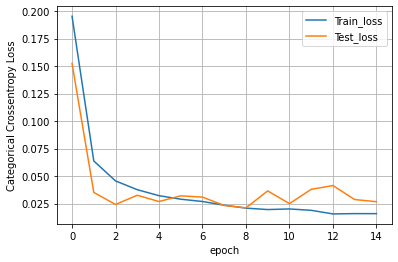

In [4]:
## Lets plot the accuracy 
import matplotlib.pyplot as plt
def plot_dynamic(x,y,y_,ax):
    ax.plot(x,y,label='Train_loss')
    ax.plot(x,y_,label='Test_loss')
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    
x = list(range(n_epoch))

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
vy = history.history['loss']
ty = history.history['val_loss']
plot_dynamic(x, vy, ty, ax)   

### Model 2 :
    Architecture 
    Kernels : 3x3,5x5,2x2
    Number of convnet layers : 5 
    Optimizer :Adam
    Activation : Relu 
    Maxpooling layers : 5
    Regularizations : Dropout,Batch Normalization

In [5]:
# from keras import backend as K
# K.common.set_image_dim_ordering('tf')

model = Sequential()
## create the architecture
model.add(Conv2D(16,activation='relu', kernel_size=(3, 3),input_shape = input_shape,padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(32, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))


model.add(BatchNormalization())
model.add(Dropout(0.35))


model.add(Conv2D(64, (2, 2), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(256, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Dense(classes, activation='softmax'))

## compile the model 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

## train the model
history = model.fit(x_train,y_train,batch_size=batch_size,\
          epochs=n_epoch,\
          verbose=1,\
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2421 - accuracy: 0.9243 - val_loss: 0.4402 - val_accuracy: 0.8528
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0852 - accuracy: 0.9725 - val_loss: 0.0407 - val_accuracy: 0.9857
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0625 - accuracy: 0.9798 - val_loss: 0.0366 - val_accuracy: 0.9892
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0450 - val_accuracy: 0.9856
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0446 - accuracy: 0.9860 - val_loss: 0.0344 - val_accuracy: 0.9897
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0435 - accuracy: 0.9863 - val_loss: 0.0361 - val_accuracy: 0.9890
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0375 - accuracy: 0.9881 - val_loss: 0.0333 - val_accuracy: 0.9902
Epoch 

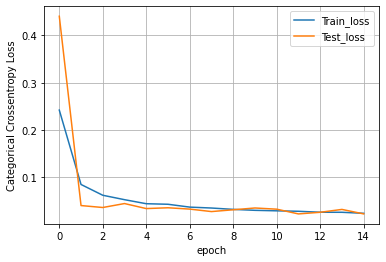

In [6]:
x = list(range(n_epoch))
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
vy = history.history['loss']
ty = history.history['val_loss']
plot_dynamic(x, vy, ty, ax)   

### Model 3 :
    Architecture 
    Kernels : 3x3,5x5,2x2,7x7
    Number of convnet layers : 7 
    Optimizer :Adam
    Activation : Relu 
    Maxpooling layers : 7
    Regularizations : Dropout,Batch Normalization after every two layers

In [7]:
model = Sequential()
## create the architecture
model.add(Conv2D(16,activation='relu', kernel_size=(3, 3),input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(64, (2, 2), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,activation='relu', kernel_size=(3, 3),padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(256, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(384, (7, 7), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(474, (5,5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(classes, activation='softmax'))

## compile the model 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

## train the model
history = model.fit(x_train,y_train,batch_size=batch_size,
          epochs=n_epoch,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
469/469 [==============================] - 10s 21ms/step - loss: 0.2895 - accuracy: 0.9096 - val_loss: 2.0209 - val_accuracy: 0.5539
Epoch 2/15
469/469 [==============================] - 9s 20ms/step - loss: 0.1095 - accuracy: 0.9672 - val_loss: 0.0518 - val_accuracy: 0.9841
Epoch 3/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0797 - accuracy: 0.9761 - val_loss: 0.0550 - val_accuracy: 0.9844
Epoch 4/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0665 - accuracy: 0.9797 - val_loss: 0.0477 - val_accuracy: 0.9858
Epoch 5/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0611 - accuracy: 0.9820 - val_loss: 0.0362 - val_accuracy: 0.9887
Epoch 6/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0517 - accuracy: 0.9844 - val_loss: 0.0517 - val_accuracy: 0.9856
Epoch 7/15
469/469 [==============================] - 10s 21ms/step - loss: 0.0454 - accuracy: 0.9869 - val_loss: 0.0388 - val_accuracy: 0.98

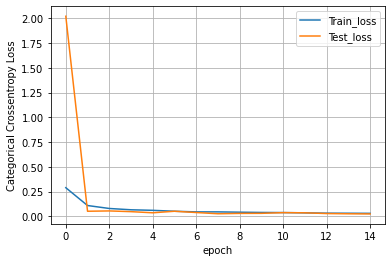

In [8]:
x = list(range(n_epoch))
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')  
ax.set_ylabel('Categorical Crossentropy Loss')
vy = history.history['loss']
ty = history.history['val_loss']
plot_dynamic(x, vy, ty, ax)

## Observations:
    * As the number of convolution layer increases accuracy increases and loss reduces 
    * As the number of convolution layers increases loss is reduces sharply at very early epochs.
    * Dropout and Batch normalization acts as regulaizers and avoids overfitting